# FinanceDataReader Package

FinanceDataReader 라는 엄청난 패키지가 어떤분이 개발하셨는지는 몰라도 재무데이터 모으는 나같은 사람에겐 실무에 큰 도움이 되었다. 진심 감사드린다.  이 패키지를 설치하고 임포트해서 간단한 주가 시계열 분석을 진행해보고자 한다. 나도 제대로 써보는 건 처음이라.. 그래도 누군가 이 포스트를 보고 도움이 되기를 간절히 바란다. 내가 하고픈 건, 원하는 주식 또는 상장ETF의 종가 Movement를 아래 그래프처럼 시각화 해보고자 한다.

<AxesSubplot:xlabel='Date'>

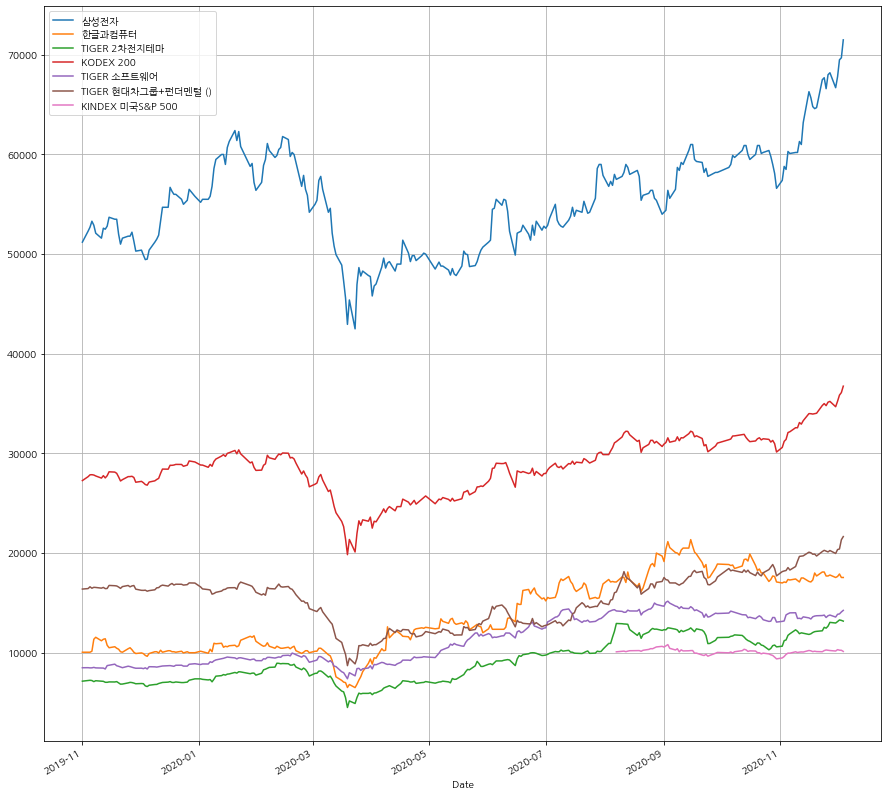

In [200]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

df.plot()


우선, 패키지를 임포트 하고 버젼을 확인해본다.

In [199]:
import FinanceDataReader as fdr

fdr.__version__


'0.9.10'

사용 가이드에 따라서 차분히 하나씩 해보고자 한다. 국내 상장사는 참고로 코스피, 코스닥, 코넥스가 존재한다. 이 3가지 마켓에 상장된 회사들의 리스트는 아래 명령어를 통해 한번에 DataFrame형태로 불러올 수 있다.

In [ ]:
KRX_LISTING = fdr.StockListing('KRX') #참고로 NYSE를 입력하면 미국시장도 소환가능!

어떤 정보를 가져왔는지 개요는 아래와 같다. 깔끔하게 약 10가지 정보를 DataFrame으로 제공해준다.

In [194]:
KRX_LISTING.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2597 entries, 0 to 2596
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Symbol          2597 non-null   object        
 1   Market          2597 non-null   object        
 2   Name            2597 non-null   object        
 3   Sector          2397 non-null   object        
 4   Industry        2377 non-null   object        
 5   ListingDate     2397 non-null   datetime64[ns]
 6   SettleMonth     2397 non-null   object        
 7   Representative  2397 non-null   object        
 8   HomePage        2229 non-null   object        
 9   Region          2397 non-null   object        
dtypes: datetime64[ns](1), object(9)
memory usage: 223.2+ KB


In [195]:
KRX_LISTING

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2592,000547,KOSPI,흥국화재2우B,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2593,000545,KOSPI,흥국화재우,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2594,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2595,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


약 2597개 회사들이 검색되고 있다. 이게 실제 맞는 숫자인지는 모르겠으나 코드 뒷단을 뜯어보니 krx marketdata에서 가져오는 것처럼 보여서 아마도 최신이 계속 반영되는 원천을 가지고 있는 듯하다. 여튼 다행 
테스트 삼아서 2가지 종목 005930과 000660의 가격추이를 그려본다. 참고로 잘 아는 삼성전자와 하이닉스다.

In [201]:
df1 = fdr.DataReader('005930', '2019-10-01', '2020-12-04') #삼성전자
df2 = fdr.DataReader('000660', '2019-10-01', '2020-12-04') #하이닉스

<AxesSubplot:xlabel='Date'>

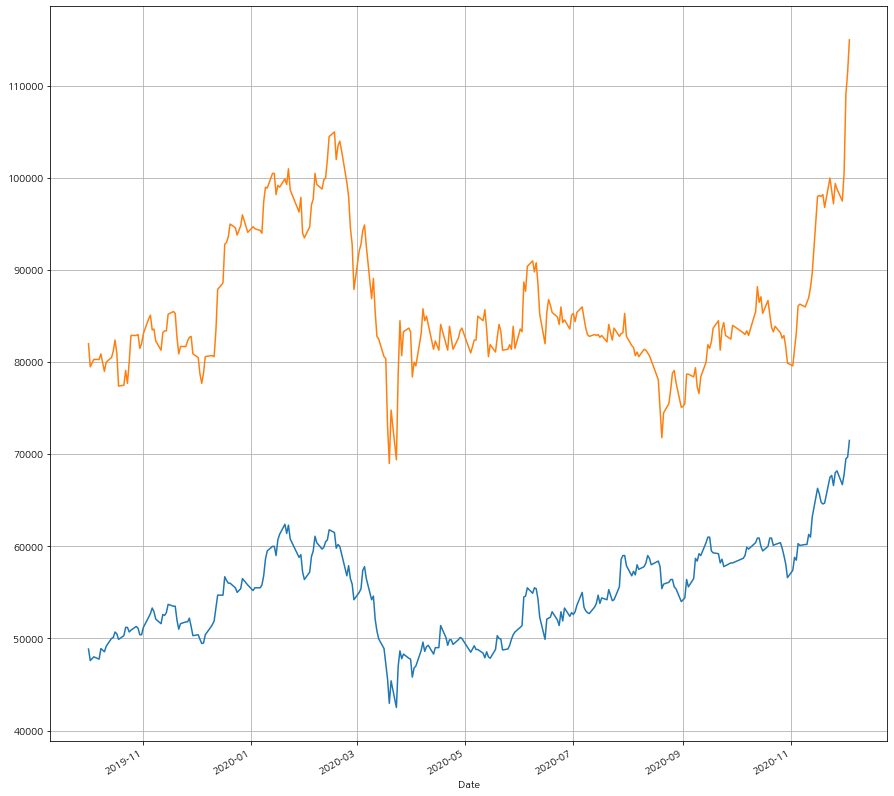

In [210]:
df1['Close'].plot()
df2['Close'].plot()

최근에 크게 가격이 상승한 것으로 보여진다. 특히 하이닉스. 이런형태로 각 종목별 레이블링과 기간에따른 종가 Movement를 조금더 디테일하게 그려보자. 삼성전자, 한글과컴퓨터, 그리고 각종 ETF의 움직임을 동시에 그려보도록 한다.

In [212]:
stock_list = [
  ["삼성전자", "005930"],
  ["한글과컴퓨터", "030520"],
  ["TIGER 2차전지테마", "305540"],
  ["KODEX 200", "069500"],
  ["TIGER 소프트웨어" ,"157490"],
  ["TIGER 현대차그룹+펀더멘털 ()","138540"],
  ["KINDEX 미국S&P 500", "360200"]
]


stock_list 안에다가 종목이름과 종목코드를 입력하고 데이터 프레임형태로 정리한다.

In [214]:
import pandas as pd

df_list = [fdr.DataReader(code, '2019-11-01', '2020-12-31')['Close'] for name, code in stock_list]
#len(df_list)


In [215]:
# pd.concat()로 합치기

df = pd.concat(df_list, axis=1)
df.columns = [name for name, code in stock_list] 
df.head(10)


,삼성전자,한글과컴퓨터,TIGER 2차전지테마,KODEX 200,TIGER 소프트웨어,TIGER 현대차그룹+펀더멘털 (),KINDEX 미국S&P 500
Date,,,,,,,
2019-11-01,51200,10050,7144,27273,8493,16388,NaN
2019-11-04,52300,10050,7204,27665,8498,16437,NaN
2019-11-05,52700,10050,7234,27851,8478,16617,NaN
2019-11-06,53300,10150,7209,27865,8483,16471,NaN
2019-11-07,52900,11350,7100,27831,8528,16563,NaN
2019-11-08,52100,11550,7189,27738,8478,16549,NaN
2019-11-11,51600,11200,7149,27524,8458,16480,NaN
2019-11-12,52600,11350,7129,27768,8458,16553,NaN
2019-11-13,52500,11400,7035,27543,8368,16432,NaN


시계열 형태로 인덱스값과 각 종목별 종가가 깔끔히 정리가 되었다. 이를 시각화 해보자

<AxesSubplot:xlabel='Date'>

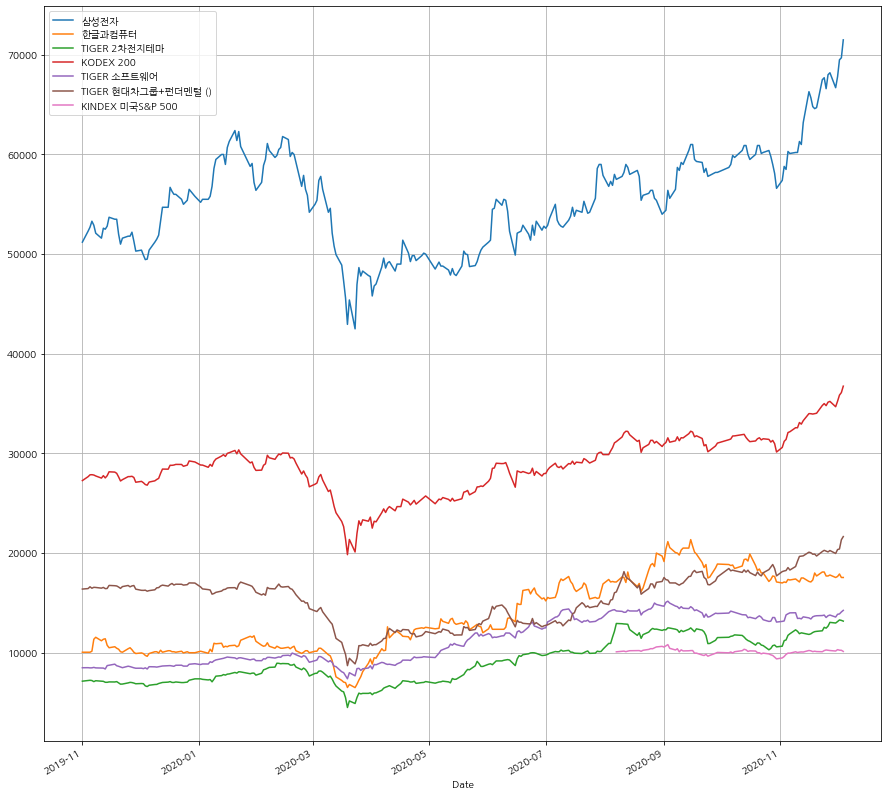

In [216]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

df.plot()


기타 다른 ETF 종목들도 동일한 방식으로 그려보면 아래와 같다.

In [217]:
stock_list2= [
  ["ARIRANG 신흥국MSCI", "195980"],
  ["KODEX 골드선물(H)", "132030"],
  ["TIGER 미국S&P500 선물(H)" ,"143850"],
    ["KODEX 200", "069500"],
    #["TIGER 소프트웨어" ,"157490"],
    #["KOSEF 국고채10년","148070"],
    #[" KODEX 단기채권PLUS", "214980"]
]

In [221]:
import pandas as pd

df_list2 = [fdr.DataReader(code, '2019-11-01', '2020-12-31')['Close'] for name, code in stock_list2]
#len(df_list)


In [222]:
# pd.concat()로 합치기

df2 = pd.concat(df_list2, axis=1)
df2.columns = [name for name, code in stock_list2] 
df2.tail(10)


,ARIRANG 신흥국MSCI,KODEX 골드선물(H),TIGER 미국S&P500 선물(H),KODEX 200
Date,,,,
2020-11-23,11795,12885,41490,34810
2020-11-24,11800,12550,41920,35000
2020-11-25,11850,12410,42320,34795
2020-11-26,11850,12445,42335,35140
2020-11-27,11930,12435,42250,35220
2020-11-30,11760,12185,42005,34685
2020-12-01,11805,12270,42535,35235
2020-12-02,11885,12450,42520,35850
2020-12-03,11960,12615,42670,36105


<AxesSubplot:xlabel='Date'>

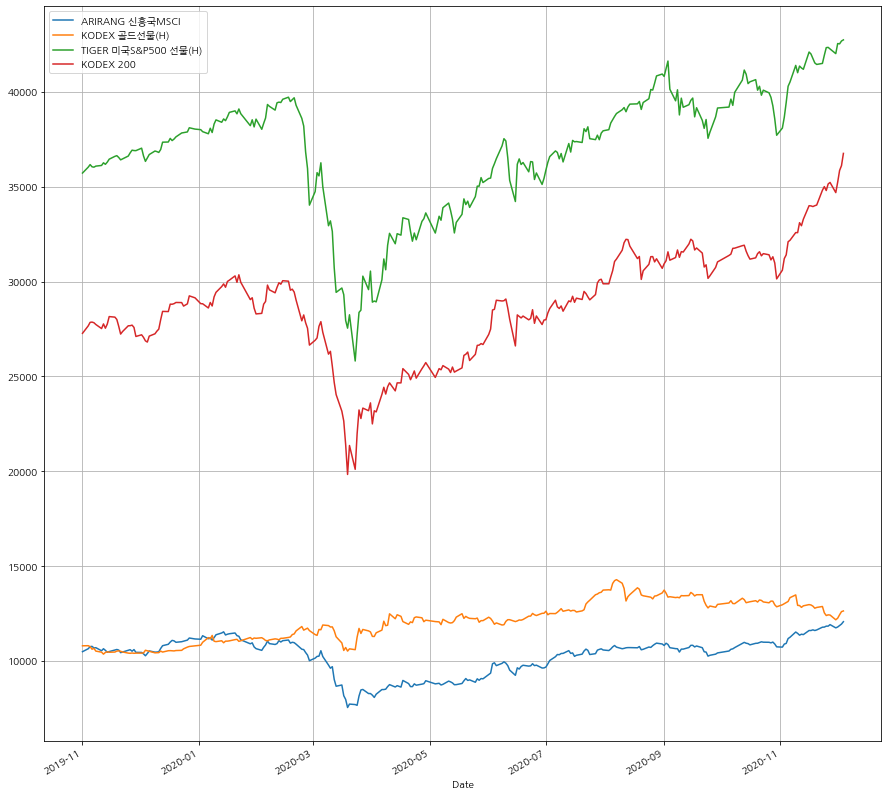

In [223]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'NanumGothic'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (15,15)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

df2.plot()


정말 좋은 패키지 같다. 놀라울정도로 깔끔한 데이터를 끌어올 수 있는 듯 하다. 강추강추!